## Resumo do Cap√≠tulo 8: Projeto de Filtros IIR

O Cap√≠tulo 8 aborda o projeto de **filtros digitais IIR** (resposta ao impulso infinita), que possuem a vantagem de poderem ser derivados de filtros anal√≥gicos bem estabelecidos. Os principais t√≥picos s√£o:

1. **Fundamentos de Filtros IIR**:  
   - Filtros IIR t√™m resposta ao impulso de dura√ß√£o infinita e podem ser projetados via transforma√ß√£o de filtros anal√≥gicos (ex: Butterworth, Chebyshev, el√≠pticos) para o dom√≠nio digital.
   - Duas abordagens s√£o apresentadas:
     - **Abordagem 1**: Projetar filtro anal√≥gico passa-baixas ‚Üí Transforma√ß√£o de banda de frequ√™ncia (anal√≥gica) ‚Üí Transforma√ß√£o anal√≥gico-digital.
     - **Abordagem 2**: Projetar filtro anal√≥gico passa-baixas ‚Üí Transforma√ß√£o anal√≥gico-digital ‚Üí Transforma√ß√£o de banda de frequ√™ncia (digital).

2. **Filtros Especiais**:
   - **Ressonadores Digitais**: Filtros passa-faixa com polos complexos pr√≥ximos √† circunfer√™ncia unit√°ria.
   - **Filtros Rejeita-Faixa (Notch)**: Eliminam frequ√™ncias espec√≠ficas (ex: 60 Hz).
   - **Filtros Pente (Comb)**: Possuem resposta peri√≥dica no dom√≠nio da frequ√™ncia.
   - **Filtros Passa-Tudo**: Mant√™m a magnitude constante, usados para equaliza√ß√£o de fase.

3. **Filtros Anal√≥gicos Protot√≠picos**:
   - **Butterworth**: Magnitude plana na banda de passagem.
   - **Chebyshev (Tipo I e II)**: Ripple na banda de passagem (Tipo I) ou na banda de rejei√ß√£o (Tipo II).
   - **El√≠ptico**: Ripple em ambas as bandas, minimizando a ordem do filtro.

4. **Transforma√ß√µes Anal√≥gico-Digital**:
   - **Invari√¢ncia ao Impulso**: Preserva a resposta ao impulso, mas pode causar *aliasing*.
   - **Transforma√ß√£o Bilinear**: Elimina *aliasing*, mas introduz distor√ß√£o n√£o linear na frequ√™ncia.

5. **Projeto com MATLAB**:
   - Fun√ß√µes como `butter`, `cheby1`, `ellip` automatizam o projeto de filtros digitais.

---

### Simula√ß√µes em Python
Implementa√ß√£o de algumas simula√ß√µes do cap√≠tulo usando `scipy.signal` e `matplotlib`. 

---

#### 1. Ressonador Digital (Se√ß√£o 8.2.1)
Projeta um ressonador com frequ√™ncia de resson√¢ncia em \(\omega_0 = \pi/3\) e raio dos polos \(r = 0.9\).


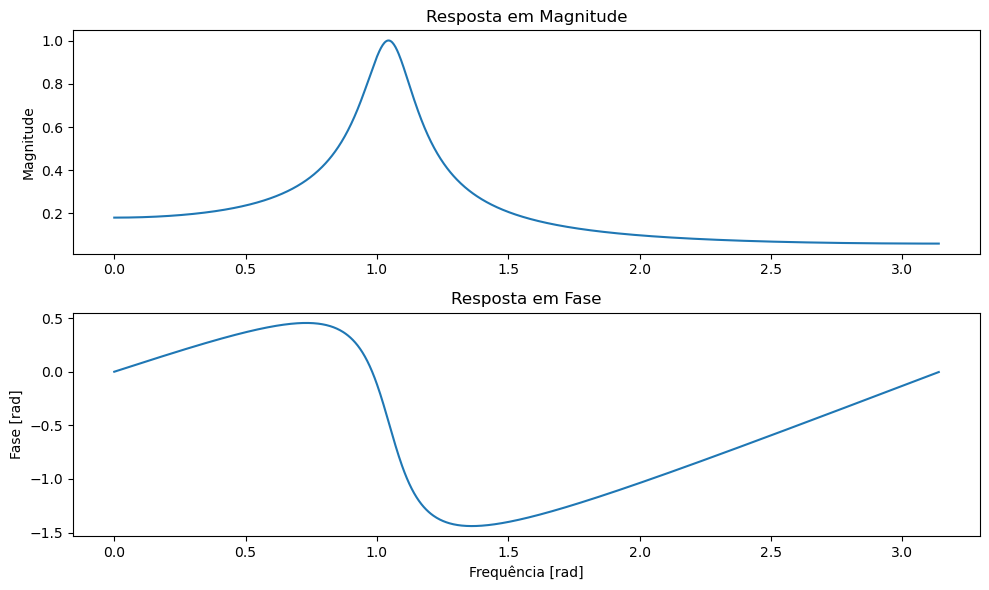

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Par√¢metros do ressonador
omega0 = np.pi / 3  # Frequ√™ncia de resson√¢ncia
r = 0.9  # Raio dos polos

# C√°lculo dos coeficientes
b0 = (1 - r) * np.sqrt(1 + r**2 - 2*r*np.cos(2*omega0))
b = [b0]
a = [1, -2*r*np.cos(omega0), r**2]

# Resposta em frequ√™ncia
w, h = signal.freqz(b, a, worN=1024)

# Plot
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(w, np.abs(h))
plt.title('Resposta em Magnitude')
plt.ylabel('Magnitude')

plt.subplot(2, 1, 2)
plt.plot(w, np.angle(h))
plt.title('Resposta em Fase')
plt.xlabel('Frequ√™ncia [rad]')
plt.ylabel('Fase [rad]')
plt.tight_layout()
plt.show()

#### 2. Filtro Rejeita-Faixa (Notch) (Se√ß√£o 8.2.2)
Projeta um filtro notch em \(\omega_0 = \pi/4\) com polos para reduzir a largura de banda (\(r = 0.85\)).

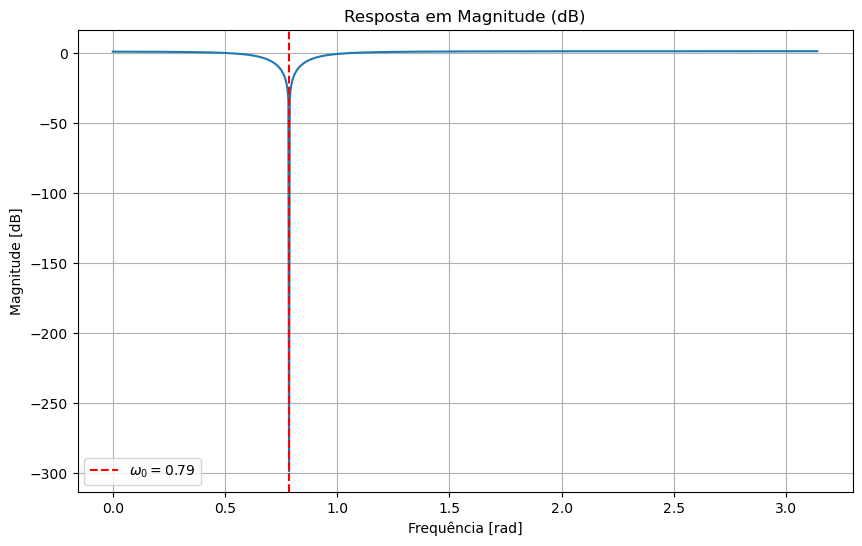

In [5]:
# Par√¢metros do filtro notch
omega0 = np.pi / 4  # Frequ√™ncia a ser rejeitada
r = 0.85  # Raio dos polos

# Coeficientes (zeros no c√≠rculo unit√°rio, polos pr√≥ximos)
b = [1, -2*np.cos(omega0), 1]
a = [1, -2*r*np.cos(omega0), r**2]

# Resposta em frequ√™ncia
w, h = signal.freqz(b, a, worN=1024)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(w, 20 * np.log10(np.abs(h)))
plt.title('Resposta em Magnitude (dB)')
plt.xlabel('Frequ√™ncia [rad]')
plt.ylabel('Magnitude [dB]')
plt.axvline(omega0, color='r', linestyle='--', label=f'$\\omega_0 = {omega0:.2f}$')
plt.legend()
plt.grid()
plt.show()



#### 3. Filtro Butterworth Passa-Baixas (Exemplo 8.17)
Projeta um filtro Butterworth digital com:
- Frequ√™ncia de passagem: \(\omega_p = 0.2\pi\)
- Frequ√™ncia de rejei√ß√£o: \(\omega_s = 0.3\pi\)
- Ripple na passagem: \(R_p = 1\) dB
- Atenua√ß√£o na rejei√ß√£o: \(A_s = 15\) dB

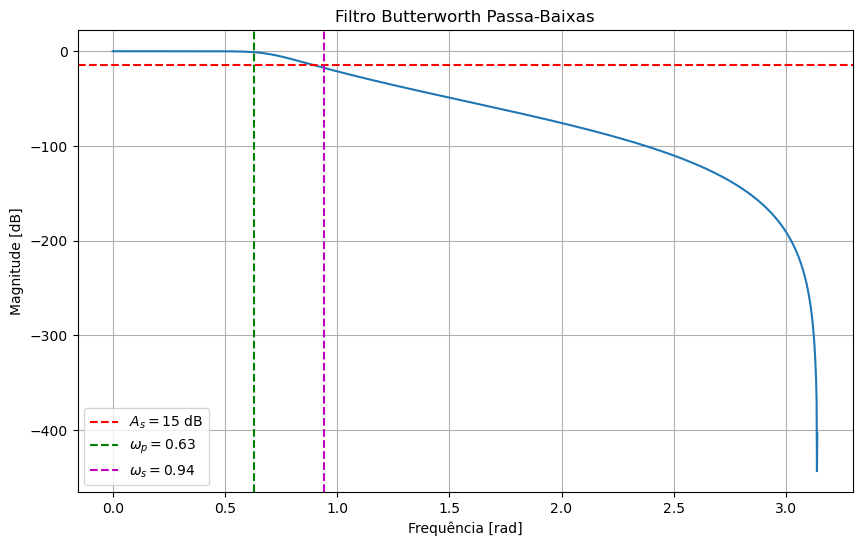

In [7]:
# Especifica√ß√µes
wp = 0.2 * np.pi  # Frequ√™ncia de passagem
ws = 0.3 * np.pi  # Frequ√™ncia de rejei√ß√£o
Rp = 1  # Ripple na passagem (dB)
As = 15  # Atenua√ß√£o na rejei√ß√£o (dB)

# Projeto via transforma√ß√£o bilinear
N, wn = signal.buttord(wp/np.pi, ws/np.pi, Rp, As)
b, a = signal.butter(N, wn, btype='low')

# Resposta em frequ√™ncia
w, h = signal.freqz(b, a, worN=2000)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(w, 20 * np.log10(np.abs(h)))
plt.title('Filtro Butterworth Passa-Baixas')
plt.xlabel('Frequ√™ncia [rad]')
plt.ylabel('Magnitude [dB]')
plt.axhline(-As, color='r', linestyle='--', label=f'$A_s = {As}$ dB')
plt.axvline(wp, color='g', linestyle='--', label=f'$\\omega_p = {wp:.2f}$')
plt.axvline(ws, color='m', linestyle='--', label=f'$\\omega_s = {ws:.2f}$')
plt.legend()
plt.grid()
plt.show()

#### 4. Compara√ß√£o de Filtros (Se√ß√£o 8.5.1)
Compara as respostas de Butterworth, Chebyshev Tipo I e El√≠ptico para as mesmas especifica√ß√µes.


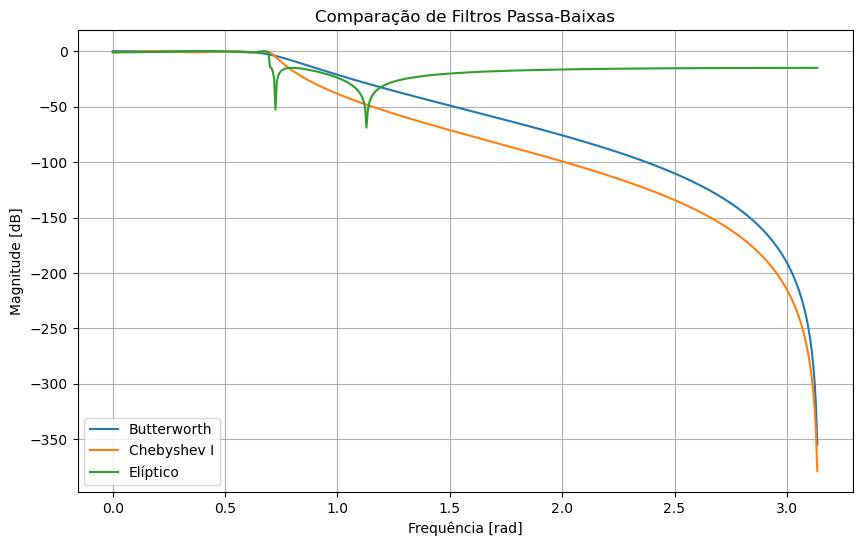

In [9]:
# Projeto dos filtros
b_butter, a_butter = signal.butter(N, wn, btype='low')
b_cheby1, a_cheby1 = signal.cheby1(N, Rp, wn, btype='low')
b_ellip, a_ellip = signal.ellip(N, Rp, As, wn, btype='low')

# Respostas em frequ√™ncia
w, h_butter = signal.freqz(b_butter, a_butter)
_, h_cheby1 = signal.freqz(b_cheby1, a_cheby1)
_, h_ellip = signal.freqz(b_ellip, a_ellip)

# Plot comparativo
plt.figure(figsize=(10, 6))
plt.plot(w, 20 * np.log10(np.abs(h_butter)), label='Butterworth')
plt.plot(w, 20 * np.log10(np.abs(h_cheby1)), label='Chebyshev I')
plt.plot(w, 20 * np.log10(np.abs(h_ellip)), label='El√≠ptico')
plt.title('Compara√ß√£o de Filtros Passa-Baixas')
plt.xlabel('Frequ√™ncia [rad]')
plt.ylabel('Magnitude [dB]')
plt.legend()
plt.grid()
plt.show()

# üé• V√≠deos sobre Filtros Digitais IIR

## V√≠deo 1 ‚Äì Filtros Digitais (UNIVESP)
https://youtu.be/CaXR0WDB-Ww?si=jwJMxISzX8ZILk-C

## V√≠deo 2 ‚Äì Filtros IIR (UNIVESP)
https://youtu.be/V-hSvPQm-ME?si=Yn5ljM-K8s5ukCPi

## V√≠deo 3 ‚Äì Projeto de Filtros (UNIVESP)
https://youtu.be/rgcbsLyf9mM?si=HPAAMyfTfOXQkgmL

## V√≠deo 4 ‚Äì Projetanto Filtros IIR (UNIVESP)
https://youtu.be/jLnhm4JgmCw?si=T1s3o8v-h4K42ZD_